In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS=10

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage\Potato",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
print(class_names)

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [5]:
len(dataset) #this is no of batches

68

## TRAINING AND TESTING

In [6]:
train_size = 0.8
train_ds = dataset.take(54) 
test_ds = dataset.take(8)
val_ds = dataset.skip(62)
len(train_ds)
len(test_ds)
len(val_ds)

6

In [7]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [8]:
resize_recycle = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [9]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

## MODEL CREATION (CNN)

In [10]:
image_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3
model = models.Sequential([
    resize_recycle,
    data_augmentation,
    #adding layers
    layers.Conv2D(32, (3,3), activation='relu', input_shape = image_shape),
    #no og conv layers, size of layer, relu  makes computation faster
    layers.MaxPooling2D(2,2),
    #all the layers are pooled and size is reduced
    #atleast 2-3 more are recommended after above like below
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    #now we flatten all the layers
    layers.Flatten(),
    #time to make the dense and final layer
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation = 'softmax'),
])

model.build(input_shape=image_shape)

# input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
# n_classes = 3

# model = models.Sequential([
#     resize_recycle,
#     layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Flatten(),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(n_classes, activation='softmax'),
# ])

# model.build(input_shape=input_shape)


# cnn = tf.keras.Sequential()
# cnn.add(tf.keras.layers.Conv2D(256, 32, 3, input_shape=image_shape))
# cnn.add(tf.keras.layers.Flatten())
# cnn.output_shape

# main_input = tf.keras.Input(shape=image_shape)
# outputs = tf.keras.layers.TimeDistributed(cnn)(main_input)
# outputs.shape

In [11]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [12]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [13]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data = val_ds
)

Epoch 1/10
54/54 [==============================] - 92s 2s/step - loss: 0.7414 - accuracy: 0.6649 - val_loss: 0.5081 - val_accuracy: 0.8310
Epoch 2/10
54/54 [==============================] - 12438s 235s/step - loss: 0.4168 - accuracy: 0.8547 - val_loss: 0.3869 - val_accuracy: 0.8646
Epoch 3/10
 2/54 [>.............................] - ETA: 1:28 - loss: 0.3876 - accuracy: 0.8438

In [ ]:
scores = model.evaluate(test_ds)

54/54 [==============================] - 12s 222ms/step - loss: 0.0661 - accuracy: 0.9693


In [ ]:
scores

[0.06605720520019531, 0.9693287014961243]

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']    

In [ ]:
print("Accuracy = ", acc)
print("Loss = ", loss)
print("Val Accuracy = ", val_acc)
print("Val Loss = ", val_loss)

Accuracy =  [0.7071759104728699, 0.8344907164573669, 0.8987268805503845, 0.9212962985038757, 0.9450231194496155, 0.9259259104728699, 0.9178240895271301, 0.9641203880310059, 0.9496527910232544, 0.9652777910232544]
Loss =  [0.6414188146591187, 0.4013782739639282, 0.24760615825653076, 0.19674573838710785, 0.13924573361873627, 0.18444515764713287, 0.19943754374980927, 0.10789299756288528, 0.132515549659729, 0.0923338234424591]
Val Accuracy =  [0.8483796119689941, 0.8373842835426331, 0.9160879850387573, 0.9357638955116272, 0.9403935074806213, 0.8831018805503845, 0.9317129850387573, 0.8912037014961243, 0.9010416865348816, 0.9693287014961243]
Val Loss =  [0.41730618476867676, 0.40855544805526733, 0.19444026052951813, 0.16408824920654297, 0.14525678753852844, 0.36384332180023193, 0.16116836667060852, 0.2828900218009949, 0.24039754271507263, 0.06605719774961472]


## PREDICTION ON SAMPLE IMAGE

first image to predict
actual label: Potato___Late_blight
predicted label: Potato___Late_blight


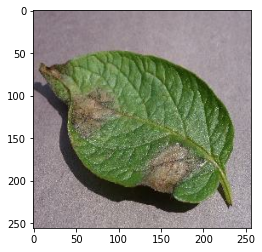

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    #prediction for the first batch
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

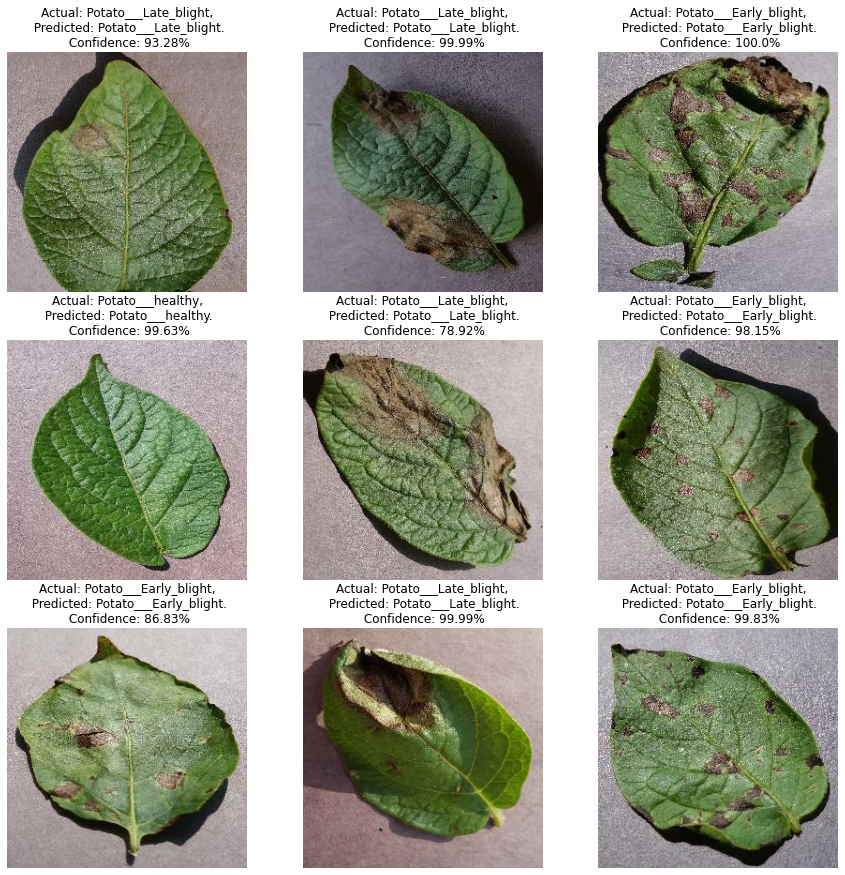

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

## SAVING THE MODEL

In [ ]:
import os
model_version=max([int(i) for i in os.listdir("../models") + [0]])+1
model.save(f"../models/{model_version}")